In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## (a)Implement rejection sampling based on the uniform distribution U[−1, 1] as proposal distribution with X ∼ U[−1, 1] and Y ∼ U[−1, 1].


In [2]:
def rejection_sampling(n_samples,circle_radius=1):
    """
       Function: Generate samples that are independent and uniformly distributed and identify the samples that are accepted within/on the circle through rejection sampling.
                
                It is assumed that circle is present at the center of considered samples boundary range that follows (x,y)⊆(-circle radius,circle radius)
        Arguments:
            n_samples(int): Number of uniformly distributed samples to generate with in the range of (-circle_radius,circle_radius=1)
            circle_radius(float): Radius of the circle with which the samples are to be accepted.
            
        Returns:
            accepted_samples(np.array): Accepted samples which follows x**2 + y**2 <= circle_radius**2 for uniformly distributed samples
                                        array size: (number of samples,2)
            
            accepted_tries(np.array): Number of tries it took to accept each sample with the circle.
                                      array size:(1,number of samples)     
    """
   
    # List to store  accepted samples that meet the condition
    accepted_samples = []
    # List to store the number of tries for accepting each sample
    accepted_tries=[]

    for each_sample in range(n_samples):
        # Initially every sample is not accepted
        accepted = False
        n_tries=0

        while not accepted:
            # Generating the independent and uniformly distributed samples untill all the samples are accepted
            x = np.random.uniform(-circle_radius,circle_radius)
            y = np.random.uniform(-circle_radius, circle_radius)
            # Counting no. of attempts for each sample before meeting the condition
            n_tries=n_tries+1
            # Check if the sample is inside the unit circle
            if x**2 + y**2 <= circle_radius**2:
                accepted = True
                # Storing the the accepted samples
                accepted_samples.append((x, y))
                #Storing the attempt at which the proposal draw is accepted
                accepted_tries.append(n_tries)
            
    return np.array(accepted_samples), np.array(accepted_tries)

n_samples = 500
# Collecting the samples and number of tries for accepting random datapoints that follows uniform distribution and falls with the unit circle x**2+y**2<=1 and 
# X⊆ U[−1, 1] and Y⊆ U[−1, 1].
accepted_samples, accepted_tries = rejection_sampling(n_samples,circle_radius=1)


In [3]:
accepted_samples

array([[ 0.03057307, -0.53266719],
       [ 0.44249479, -0.69841085],
       [-0.6859797 ,  0.46786509],
       [ 0.33063167, -0.05595093],
       [ 0.74854189, -0.10797513],
       [ 0.04777242, -0.866617  ],
       [-0.30224191, -0.6236836 ],
       [ 0.0080634 , -0.46764045],
       [ 0.61120845, -0.13957843],
       [-0.44294043, -0.85945818],
       [-0.38595941,  0.09419168],
       [ 0.22103985,  0.29394622],
       [ 0.41463549,  0.61648393],
       [ 0.29615696,  0.2568909 ],
       [ 0.17272998, -0.09702011],
       [ 0.08456595,  0.42734811],
       [-0.20155026,  0.15177036],
       [ 0.09278202, -0.56045418],
       [-0.6412972 , -0.33469452],
       [-0.14151679, -0.65318117],
       [ 0.73046672, -0.06063875],
       [-0.28965948, -0.10970658],
       [ 0.62921666,  0.74901896],
       [-0.10598716,  0.2711222 ],
       [ 0.67320704, -0.28740616],
       [-0.47181357,  0.3385574 ],
       [ 0.74802091,  0.26226492],
       [ 0.77465992, -0.43261511],
       [-0.36285596,

## (b) Generate n = 500 samples of the uniform distribution via your code. Plot the generated 500 samples.

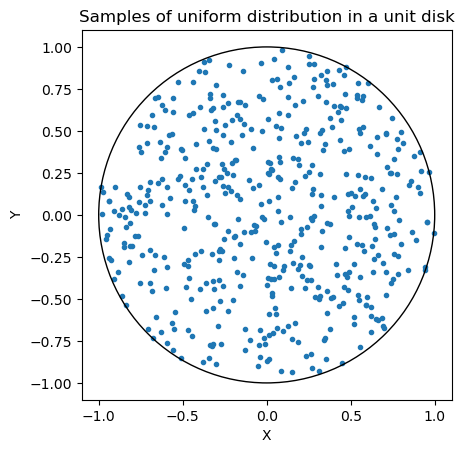

In [4]:
n_samples = 500
# Collecting the number of tries for accepting random datapoints that follows uniform distribution
accepted_samples, accepted_tries = rejection_sampling(n_samples,circle_radius=1)


# Visualizing the accepted data points in a scatter plot 
fig,axis=plt.subplots()
plt.scatter(accepted_samples[:, 0], accepted_samples[:, 1], marker='.')

# plot a unit circle with radius 1 for visual reference of the boundary range of condition
circle=plt.Circle((0, 0), 1, color="black",fill=False)
axis.add_patch(circle)
# Setting the aspect ratio of x and y axis as equal
axis.set_aspect("equal")
# Labelling the title of the figure
axis.set_title("Samples of uniform distribution in a unit disk")
#Labelling the xaxis and yaxiss of the figure
axis.set_xlabel("X")
axis.set_ylabel("Y")
plt.show()

## (c)
### Estimate on the number π based on the stored number of tries of rejection
 ### How large is the success/acceptance probability in this case?

In [5]:
def estimate_pi(accepted_tries,circle_radius):
    """
    Function: To determine the probablity of accepted samples and estimate value of π based on the stored number of tries in the rejection sampling process.
            
              It is assumed that circle is present at the center of considered samples boundary range that follows (x,y)⊆(-circle radius,circle radius)
    
    Arguments:
            accepted_tries(np.array): Number of tries required for accepted samples.
            circle_radius(float): Radius of circle within which samples are accepted.
    
    Returns:
            estimated_pi(float):Estimated value of pi based on the average number of tries took to accept the samples
            estimated_prob_acceptance(float): Estimated probility of success/acceptance based on the average number of tries.
    
    """

    # The probability of acceptance is the sum of total nuber of attempts required w.r.t the total number of accepted tries
    estimated_avg_tries=accepted_tries.sum()/len(accepted_tries)
    
    # probability of acceptance=(Area of circle)/Area of square  =1/avg_tries
                                #=>1/avg_tries=(pi*(circle_radius**2))/(2*circle_radius)**2
                                #=> pi=((2*circle_radius)**2)/(avg_tries*(circle_radius**2))
    
    estimated_pi=((2*circle_radius)**2)/(estimated_avg_tries*(circle_radius**2))
   
    # Determining the probability of acceptance 
    estimated_prob_acceptance=(estimated_pi*(circle_radius**2))/(2*(circle_radius))**2
    
    return estimated_pi,estimated_prob_acceptance

In [6]:
# Compute the estimated pi for the accepted random points with the unit circle
estimated_pi,estimated_prob_acceptance=estimate_pi(accepted_tries,circle_radius=1)

print(f"The estimated pi based on average number of tries of rejection sampling in the case is {estimated_pi}\n")
print(f"The probability of acceptance in this case is {estimated_prob_acceptance}")

The estimated pi based on average number of tries of rejection sampling in the case is 3.2102728731942216

The probability of acceptance in this case is 0.8025682182985554


In [7]:
# It can be observed that estimated pi through random rejection sampling is 
# close to the actual pi value of 3.14. This validates our rejection sampling.